

 Pasul 1: Importarea și încărcarea datelor

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('UberDataset.csv')

# Verificare dimensiuni și tipuri
print(df.shape)
print(df.info())
print(df.head())

(1155, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   START_DATE        1155 non-null   object 
 1   END_DATE          1155 non-null   object 
 2   CATEGORY          1155 non-null   object 
 3   START             1155 non-null   object 
 4   STOP              1155 non-null   object 
 5   MILES             1155 non-null   float64
 6   PURPOSE           653 non-null    object 
 7   Price             1155 non-null   float64
 8   NUMBER_OF_PEOPLE  1085 non-null   float64
dtypes: float64(3), object(6)
memory usage: 81.3+ KB
None
            START_DATE             END_DATE  CATEGORY        START  \
0  2016-01-01 21:11:00  2016-01-01 21:17:00  Business  Fort Pierce   
1  2016-01-02 01:25:00  2016-01-02 01:37:00  Business  Fort Pierce   
2  2016-01-02 20:25:00  2016-01-02 20:38:00  Business  Fort Pierce   
3  2016-01-05 17:31:00  2016-

In [4]:
#Analiza statistică descriptivă
print("\nStatistici descriptive pentru coloanele numerice:")
print(df.describe())


Statistici descriptive pentru coloanele numerice:
             MILES        Price  NUMBER_OF_PEOPLE
count  1155.000000  1155.000000       1085.000000
mean     10.566840    23.173506          2.000000
std      21.579106    42.439506          0.817249
min       0.500000    10.000000          1.000000
25%       2.900000    10.000000          1.000000
50%       6.000000    12.000000          2.000000
75%      10.400000    20.800000          3.000000
max     310.300000   620.600000          3.000000


In [5]:
nan_summary = df.isnull().sum()
nan_percentage = (df.isnull().sum() / len(df)) * 100
print(nan_percentage)

START_DATE           0.000000
END_DATE             0.000000
CATEGORY             0.000000
START                0.000000
STOP                 0.000000
MILES                0.000000
PURPOSE             43.463203
Price                0.000000
NUMBER_OF_PEOPLE     6.060606
dtype: float64



Număr valori lipsă per coloană:
START_DATE            0
END_DATE              0
CATEGORY              0
START                 0
STOP                  0
MILES                 0
PURPOSE             502
Price                 0
NUMBER_OF_PEOPLE     70
dtype: int64

Procentul de valori lipsă per coloană:
START_DATE           0.000000
END_DATE             0.000000
CATEGORY             0.000000
START                0.000000
STOP                 0.000000
MILES                0.000000
PURPOSE             43.463203
Price                0.000000
NUMBER_OF_PEOPLE     6.060606
dtype: float64


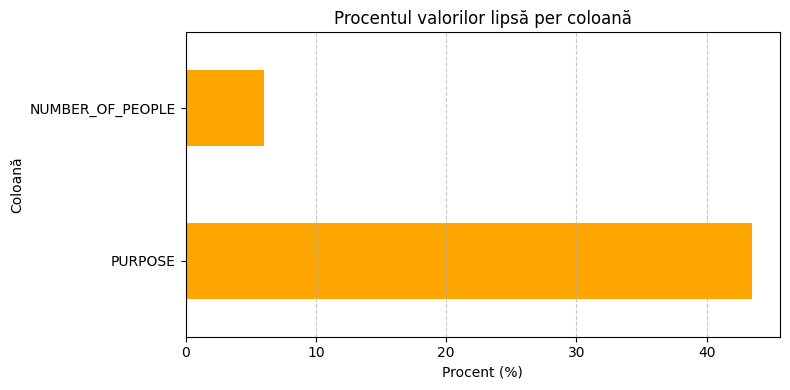

In [6]:
 #Analiza valorilor lipsă
print("\nNumăr valori lipsă per coloană:")
missing_vals = df.isnull().sum()
print(missing_vals)

print("\nProcentul de valori lipsă per coloană:")
missing_percent = (missing_vals / len(df)) * 100
print(missing_percent)

#Vizualizarea valorilor lipsă
missing_df = pd.DataFrame({
    'Missing Values': missing_vals,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

plt.figure(figsize=(8,4))
missing_df['Percentage'].plot(kind='barh', color='orange')
plt.title('Procentul valorilor lipsă per coloană')
plt.xlabel('Procent (%)')
plt.ylabel('Coloană')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tratarea valorilor lipsa:

Pentru 'NUMBER_OF_PEOPLE', care reprezinta numarul de persoane care au participat la cursa uber respectiva, vom face imputare cu mediana

Pentru 'PURPOSE', care reprezinta scopul cursei uber respective, cream o coloana binara: are/nu are mentionat scopul calatoriei

In [7]:
# 5. Tratarea valorilor lipsă
# Pentru 'NUMBER_OF_PEOPLE' (care are ~6% lipsă),
# putem face imputare cu mediana
median_value = df['NUMBER_OF_PEOPLE'].median()
df['NUMBER_OF_PEOPLE'] = df['NUMBER_OF_PEOPLE'].fillna(median_value)

# Pentru 'PURPOSE' notăm rândurile lipsă.
# Creăm o coloană binară: are / nu are scopul calatoriei mentionat
df['has_purpose'] = df['PURPOSE'].apply(lambda x: 0 if pd.isnull(x) else 1)
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Price,NUMBER_OF_PEOPLE,has_purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,10.2,2.0,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,10.0,1.0,0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,10.0,3.0,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,10.0,3.0,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,127.4,3.0,1
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,10.0,3.0,1
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,14.2,1.0,1
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,10.0,3.0,1
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,16.6,2.0,1
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,33.0,1.0,1


In [8]:
 #Analiza valorilor lipsă
print("\nNumăr valori lipsă per coloană:")
missing_vals = df.isnull().sum()
print(missing_vals)

print("\nProcentul de valori lipsă per coloană:")
missing_percent = (missing_vals / len(df)) * 100
print(missing_percent)


Număr valori lipsă per coloană:
START_DATE            0
END_DATE              0
CATEGORY              0
START                 0
STOP                  0
MILES                 0
PURPOSE             502
Price                 0
NUMBER_OF_PEOPLE      0
has_purpose           0
dtype: int64

Procentul de valori lipsă per coloană:
START_DATE           0.000000
END_DATE             0.000000
CATEGORY             0.000000
START                0.000000
STOP                 0.000000
MILES                0.000000
PURPOSE             43.463203
Price                0.000000
NUMBER_OF_PEOPLE     0.000000
has_purpose          0.000000
dtype: float64


Analiza distributiei datelor


In [9]:
#Coloane numerice
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['MILES', 'Price', 'NUMBER_OF_PEOPLE', 'has_purpose'], dtype='object')

In [10]:
# Coloane categorice:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE'], dtype='object')

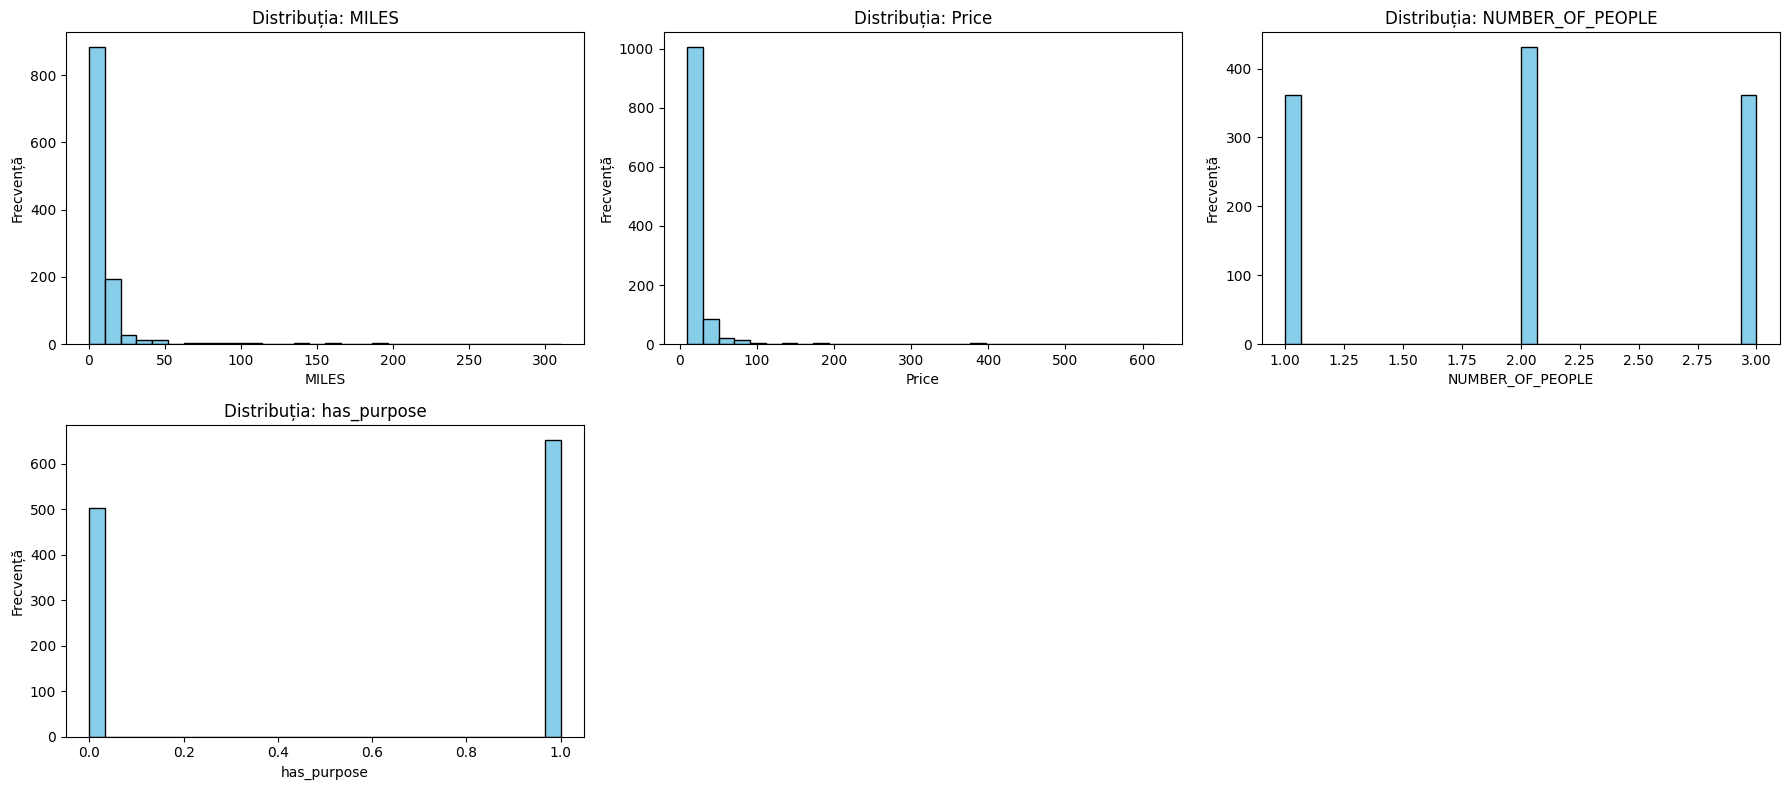

In [11]:
# Generarea histogramelor pentru variabilele numerice
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

# Iterăm prin fiecare coloană numerică și generăm histogramă
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', color='skyblue')
    plt.title(f'Distribuția: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecvență')
plt.tight_layout()
plt.show()

Price: Distribuție extrem de asimetrică (coadă foarte lungă la dreapta). Majoritatea valorilor par concentrate sub 100 de dolari/cursa.

Această asimetrie puternică poate afecta modelele liniare și măsurile de eroare sensibile la outliers (ex. MSE). Adesea se recomandă o transformare logaritmică pentru a reduce influența outlier-ilor și a aduce distribuția mai aproape de una normală. Trebuie investigat dacă valorile foarte mari sunt date reale (proprietăți de lux) sau erori de introducere a datelor.

Miles: Distribuție extrem de asimetrică (coadă foarte lungă la dreapta). Majoritatea valorilor par concentrate sub 50 de dolari/cursa,  dar exista si valori in jur de 100,150 sau 200.

Această asimetrie puternică poate afecta modelele liniare și măsurile de eroare sensibile la outliers (ex. MSE). Adesea se recomandă o transformare logaritmică pentru a reduce influența outlier-ilor și a aduce distribuția mai aproape de una normală. Trebuie investigat dacă valorile foarte mari sunt date reale (proprietăți de lux) sau erori de introducere a datelor.


C:\Users\denis\AppData\Local\Temp\ipykernel_13632\723660087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


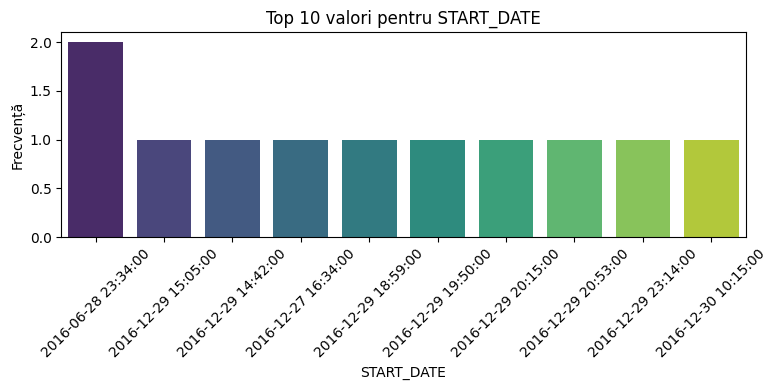

C:\Users\denis\AppData\Local\Temp\ipykernel_13632\723660087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


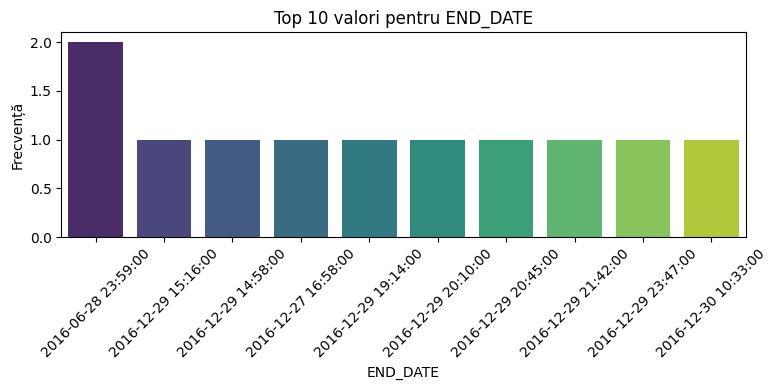

C:\Users\denis\AppData\Local\Temp\ipykernel_13632\723660087.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


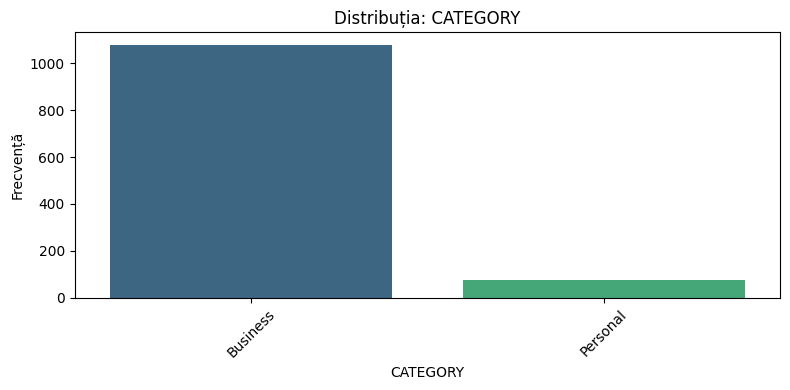

C:\Users\denis\AppData\Local\Temp\ipykernel_13632\723660087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


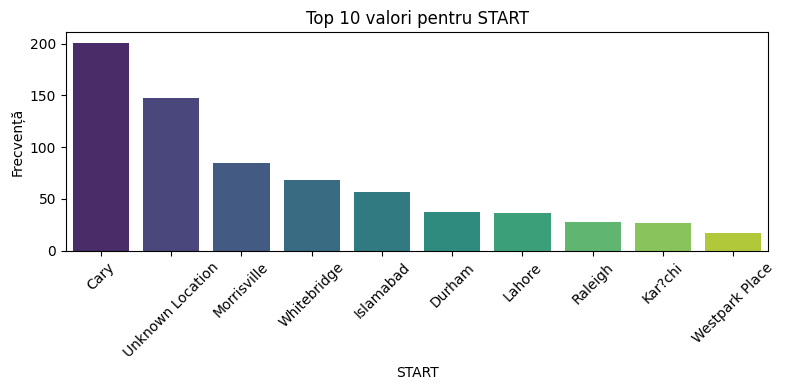

C:\Users\denis\AppData\Local\Temp\ipykernel_13632\723660087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


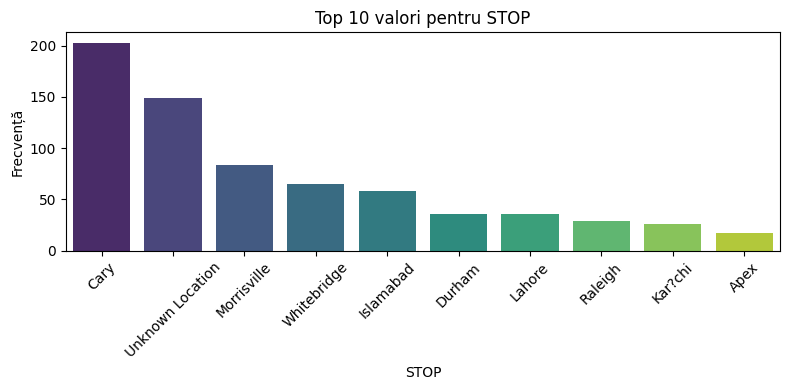

C:\Users\denis\AppData\Local\Temp\ipykernel_13632\723660087.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


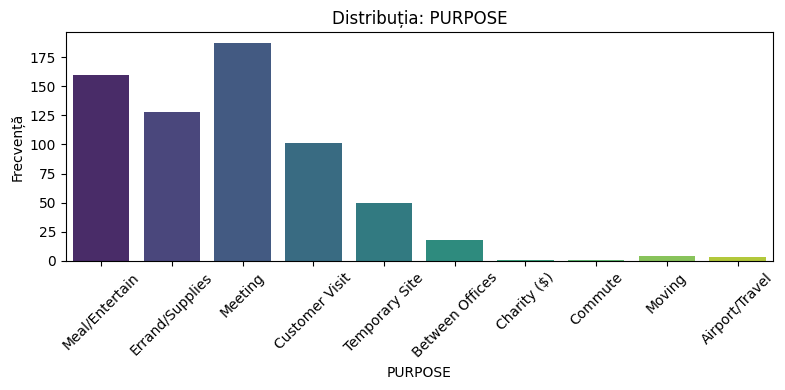

In [12]:

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    unique_count = df[col].nunique()
    if unique_count > 10:
        top_categories = df[col].value_counts().nlargest(10)
        sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
        plt.title(f"Top 10 valori pentru {col}")
        plt.xlabel(col)
        plt.ylabel("Frecvență")
        plt.xticks(rotation=45)
    else:
        sns.countplot(x=col, data=df, palette='viridis')
        plt.title(f'Distribuția: {col}')
        plt.xlabel(col)
        plt.ylabel('Frecvență')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

EXtragere informatii din date


In [13]:
def plot_pairplot_numeric(df, numeric_cols):
    """
    Creează un pairplot pentru variabilele numerice.
    - diag_kind='kde' -> pe diagonală se afișează grafic de densitate
    - corner=True -> afișează doar jumătate din matrice (opțional)
    """
    sns.pairplot(df[numeric_cols], diag_kind='kde')
    plt.suptitle("Pairplot pentru variabilele numerice", y=1.02)
    plt.show()



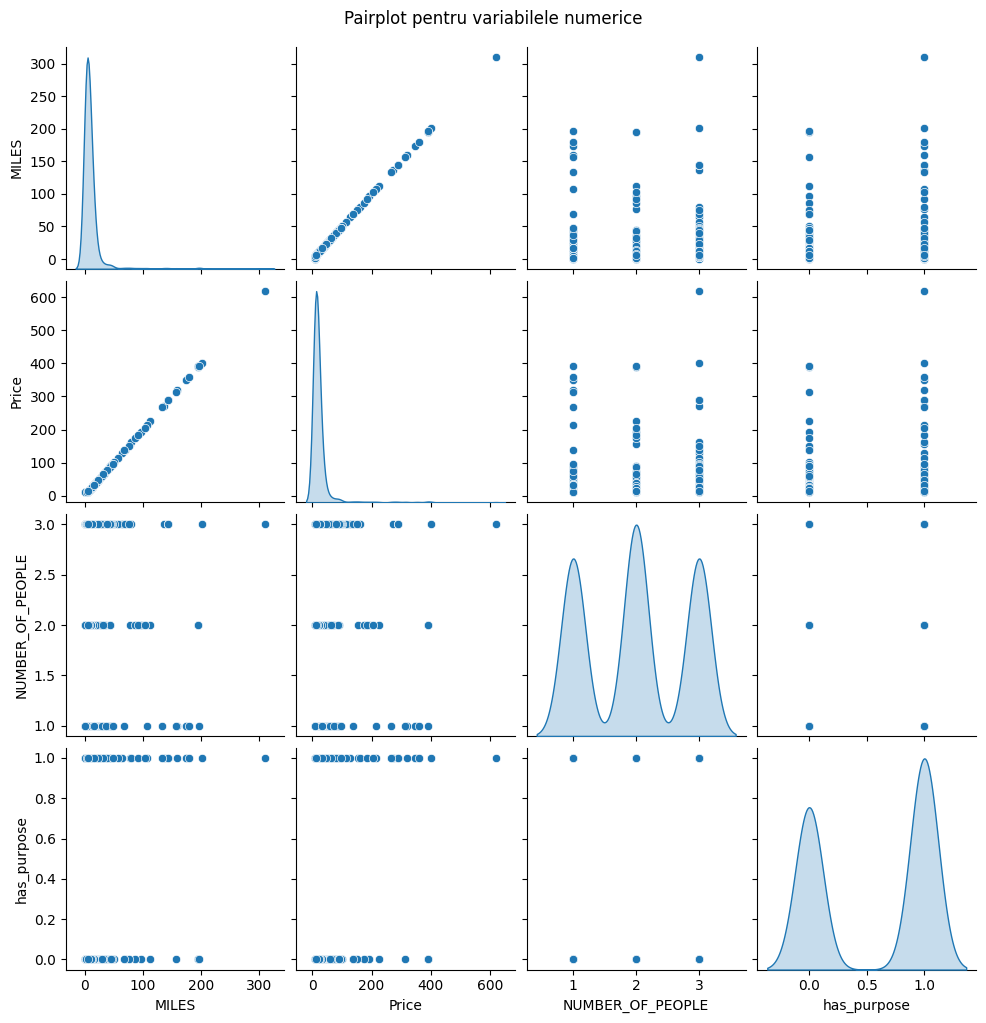

In [14]:

plot_pairplot_numeric(df, numerical_cols)




MILES:

Cel mai adesea are valori mici, sub 50 de mile.

Există câțiva outlieri peste 200 de mile.

Interpretare: Majoritatea călătoriilor sunt pe distanțe scurte, dar unele depășesc 200 de mile, indicând posibil călătorii excepționale sau cazuri speciale.

PRICE:

Majoritatea prețurilor sunt sub 100, dar există câteva cazuri cu prețuri mult mai mari, peste 500.

Interpretare: Majoritatea tranzacțiilor au prețuri accesibile, dar există și câteva excepții unde prețurile sunt semnificativ mai mari, din cauza unor factori precum distanța sau serviciile incluse.

MILES vs PRICE

Se observă o relație aproape liniară între distanță și preț: pe măsură ce milele cresc, și prețul crește.

In [15]:
def plot_boxplot_cat_numeric(df, cat_col, num_col):
    """
    Creează un boxplot care compară distribuția unei variabile numerice (num_col)
    în funcție de o variabilă categorică (cat_col).
    """
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=cat_col, y=num_col, palette='viridis')
    plt.title(f"Boxplot pentru {num_col} în funcție de {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_boxplots_for_all_cats(df, numeric_col, cat_cols):
    """
    Creează boxplot-uri pentru o variabilă numerică, împărțită pe mai multe coloane categorice.
    De exemplu, dacă cat_cols = ['neighbourhood_group', 'room_type'],
    se vor crea două boxplot-uri diferite.
    """
    for cat_col in cat_cols:
        if cat_col in df.columns:
            plot_boxplot_cat_numeric(df, cat_col, numeric_col)
        else:
            print(f"Coloana {cat_col} nu există în DataFrame.")

C:\Users\denis\AppData\Local\Temp\ipykernel_13632\4096969344.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='viridis')


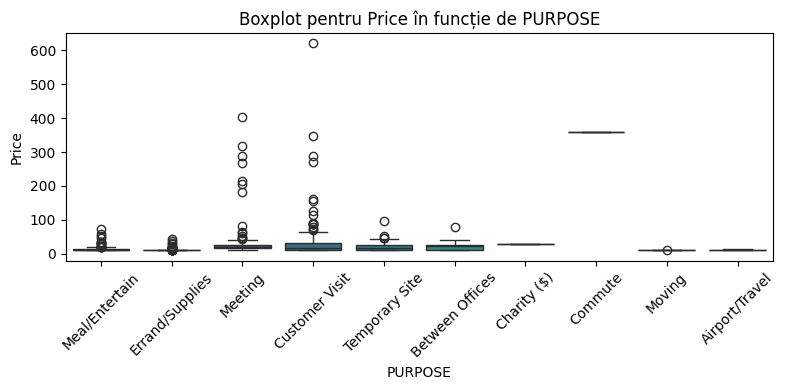

In [16]:
# 2. Boxplot numeric vs. categoric
# Exemplu: comparăm 'Price' (numeric) în funcție de 'PURPOSE' (categoric)
plot_boxplot_cat_numeric(df, cat_col='PURPOSE', num_col='Price')



C:\Users\denis\AppData\Local\Temp\ipykernel_13632\4096969344.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='viridis')


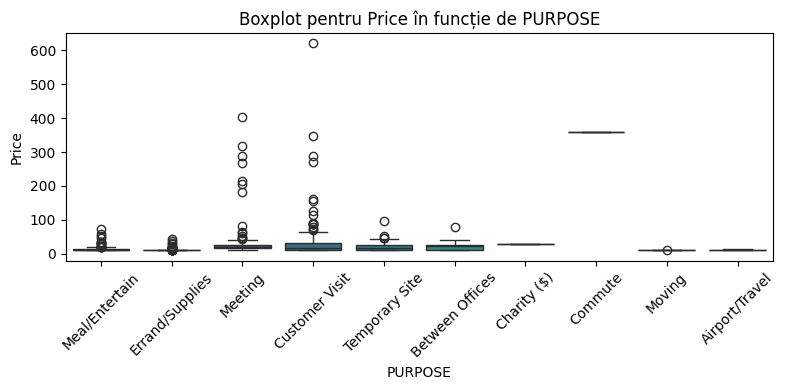

C:\Users\denis\AppData\Local\Temp\ipykernel_13632\4096969344.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='viridis')


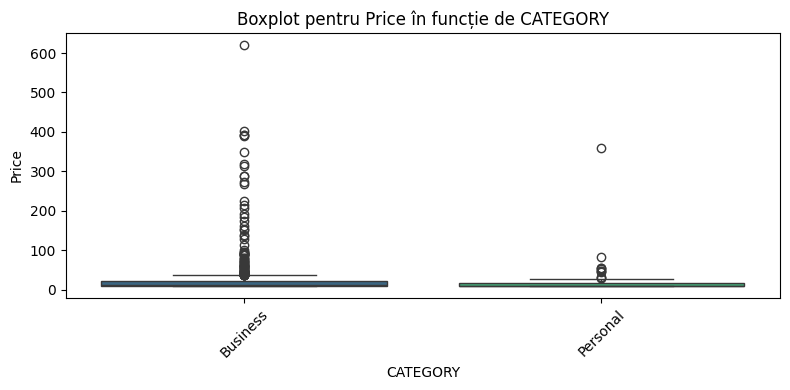

In [17]:
# 3. Boxplot pentru mai multe coloane categorice
# Exemplu: 'PURPOSE' și 'CATEGORY' vs. 'price'
categorical_cols = ['PURPOSE', 'CATEGORY']
plot_boxplots_for_all_cats(df, numeric_col='Price', cat_cols=categorical_cols)

1. Boxplot pentru Price în funcție de PURPOSE (Scopul călătoriei)

Observații generale:

Majoritatea călătoriilor au prețuri sub 100, dar există excepții care depășesc 500.

"Customer Visit" și "Meeting" au multe outliere, indicând că pentru aceste scopuri se cheltuiesc uneori sume foarte mari.

"Charity ($)" și "Commute" prezintă valori mult mai mari decât celelalte categorii, ceea ce sugerează că aceste tipuri de călătorii pot implica costuri speciale.

"Errand/Supplies", "Meal/Entertain" și "Airport/Travel" au prețuri relativ mici, cu puțini outlieri, ceea ce indică un cost previzibil.

Interpretare:

Călătoriile pentru "Customer Visit" și "Meeting" pot implica distanțe mari sau servicii speciale, justificând costurile ridicate. Pe de altă parte, naveta zilnică și aprovizionarea au costuri mai stabile și mai mici.

2. Boxplot pentru Price în funcție de CATEGORY (Business vs. Personal)

Observații generale:

Călătoriile de business au o distribuție mai largă a prețurilor, cu numeroși outlieri peste 500.

Călătoriile personale sunt mai ieftine în medie, dar și aici apar câteva cazuri excepționale cu prețuri mari.

Interpretare:

Călătoriile de business tind să fie mai costisitoare, probabil datorită cheltuielilor pentru transport premium, cazare sau evenimente corporate. Călătoriile personale sunt în general mai ieftine, dar unele excepții ar putea reprezenta excursii de lux sau situații speciale.

**ENCODAREA **


One-Hot Encoding


In [18]:
df_encode_exemple = pd.DataFrame({
    'PURPOSE': ['Meal/Entertein', 'Errand/Supplies', 'Meeting', 'Customer Visit', 'Temporary Site', 'Between Offices', 'Charity', 'Commute', 'Moving', 'Airport/Travel']
})

df_onehot = pd.get_dummies(df_encode_exemple, columns=['PURPOSE'], drop_first=True)
print(df_onehot)


   PURPOSE_Between Offices  PURPOSE_Charity  PURPOSE_Commute  \
0                    False            False            False   
1                    False            False            False   
2                    False            False            False   
3                    False            False            False   
4                    False            False            False   
5                     True            False            False   
6                    False             True            False   
7                    False            False             True   
8                    False            False            False   
9                    False            False            False   

   PURPOSE_Customer Visit  PURPOSE_Errand/Supplies  PURPOSE_Meal/Entertein  \
0                   False                    False                    True   
1                   False                     True                   False   
2                   False                    False           

Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

df_label_enoder = pd.DataFrame({
    'CATEGORY': ['Bussines', 'Personal']
})

le = LabelEncoder()
df_label_enoder['CATEGORY_encoded'] = le.fit_transform(df_label_enoder['CATEGORY'])
print(df_label_enoder)

   CATEGORY  CATEGORY_encoded
0  Bussines                 0
1  Personal                 1


In [32]:
df_frequency = pd.DataFrame({
    'PURPOSE': ['Meal/Entertein', 'Errand/Supplies', 'Meeting', 'Customer Visit', 'Temporary Site', 'Between Offices', 'Charity', 'Commute', 'Moving', 'Airport/Travel']
})

# Calculăm frecvența pentru fiecare categorie
freq_encoding = df_frequency['PURPOSE'].value_counts(normalize=True)
df_frequency['PURPOSE_freq_encoded'] = df_frequency['PURPOSE'].map(freq_encoding)
print(df_frequency)

'''
Valorile devin proporția apariției fiecărei categorii. Aceasta poate ajuta modele care interpretează frecvența ca un indicator al relevanței sau popularității
'''

           PURPOSE  PURPOSE_freq_encoded
0   Meal/Entertein                   0.1
1  Errand/Supplies                   0.1
2          Meeting                   0.1
3   Customer Visit                   0.1
4   Temporary Site                   0.1
5  Between Offices                   0.1
6          Charity                   0.1
7          Commute                   0.1
8           Moving                   0.1
9   Airport/Travel                   0.1


'\nValorile devin proporția apariției fiecărei categorii. Aceasta poate ajuta modele care interpretează frecvența ca un indicator al relevanței sau popularității\n'

In [33]:
# One-Hot Encoding pentru variabilele cu low cardinality:
# Aplicăm one-hot encoding pentru 'PURPOSE' și 'CATEGORY'
df_encoded = pd.get_dummies(df, columns=['PURPOSE', 'CATEGORY'], drop_first=True)

# Encoding pentru variabila 'neighbourhood' (high cardinality)
# a. Frequency Encoding:
# Calculăm frecvența relativă pentru fiecare locatie de start și o mapăm la 'START'
START_freq = df['START'].value_counts(normalize=True)
df_encoded['START_freq'] = df['START'].map(START_freq)


# 6. Vizualizăm primele rânduri pentru a verifica transformările
print(df_encoded.head())

            START_DATE             END_DATE        START             STOP  \
0  2016-01-01 21:11:00  2016-01-01 21:17:00  Fort Pierce      Fort Pierce   
1  2016-01-02 01:25:00  2016-01-02 01:37:00  Fort Pierce      Fort Pierce   
2  2016-01-02 20:25:00  2016-01-02 20:38:00  Fort Pierce      Fort Pierce   
3  2016-01-05 17:31:00  2016-01-05 17:45:00  Fort Pierce      Fort Pierce   
4  2016-01-06 14:42:00  2016-01-06 15:49:00  Fort Pierce  West Palm Beach   

   MILES  Price  NUMBER_OF_PEOPLE  has_purpose  PURPOSE_Between Offices  \
0    5.1   10.2               2.0            1                    False   
1    5.0   10.0               1.0            0                    False   
2    4.8   10.0               3.0            1                    False   
3    4.7   10.0               3.0            1                    False   
4   63.7  127.4               3.0            1                    False   

   PURPOSE_Charity ($)  PURPOSE_Commute  PURPOSE_Customer Visit  \
0                Fa

Acum trecem la standardizare și normalizare, două tehnici esențiale de scalare a datelor

Standardizare

In [34]:
cols_to_drop = df_encoded.select_dtypes(include=['object']).columns
print("Eliminăm coloanele:", cols_to_drop.tolist())

df_encoded = df_encoded.drop(columns=cols_to_drop)

Eliminăm coloanele: ['START_DATE', 'END_DATE', 'START', 'STOP']


In [35]:
from sklearn.preprocessing import StandardScaler

#
scaler = StandardScaler()

# Aplicăm standardizarea pe coloana 'price'

df_encoded['Price'] = scaler.fit_transform(df_encoded[['Price']])
# Verificăm media și deviația standard după standardizare
print("Media după standardizare:", df_encoded['Price'].mean())
print("Deviația standard după standardizare:", df_encoded['Price'].std())

Media după standardizare: -1.5379712895240264e-18
Deviația standard după standardizare: 1.0004331817400482


Normalizare

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Creăm un obiect MinMaxScaler care scalează datele între 0 și 1 (implicit)
minmax_scaler = MinMaxScaler()

# Aplicăm normalizarea pe coloana 'price'
df_encoded['Price_normalized'] = minmax_scaler.fit_transform(df[['Price']])

# Verificăm valorile minime și maxime după normalizare
print("Valoare minimă după normalizare:", df_encoded['Price_normalized'].min())
print("Valoare maximă după normalizare:", df_encoded['Price_normalized'].max())

Valoare minimă după normalizare: 0.0
Valoare maximă după normalizare: 0.9999999999999999


In [37]:

scaler = StandardScaler()
numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Displaying the final dataframe structure after feature engineering
print("Displaying DataFrame after feature engineering:")
print(df_encoded.head())

# Converting boolean columns explicitly to integers
bool_cols = df_encoded.select_dtypes(include = ['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Confirming final changes clearly
print("\nConfirming DataFrame structure after converting booleans:")
print(df_encoded.head())

Displaying DataFrame after feature engineering:
      MILES     Price  NUMBER_OF_PEOPLE  has_purpose  PURPOSE_Between Offices  \
0 -0.253449 -0.305827          0.000000     0.876789                    False   
1 -0.258085 -0.310541         -1.263053    -1.140525                    False   
2 -0.267358 -0.310541          1.263053     0.876789                    False   
3 -0.271994 -0.310541          1.263053     0.876789                    False   
4  2.463317  2.456948          1.263053     0.876789                    False   

   PURPOSE_Charity ($)  PURPOSE_Commute  PURPOSE_Customer Visit  \
0                False            False                   False   
1                False            False                   False   
2                False            False                   False   
3                False            False                   False   
4                False            False                    True   

   PURPOSE_Errand/Supplies  PURPOSE_Meal/Entertain  PURPOSE_Me

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

target = 'Price'

# Eliminăm coloana țintă din setul de caracteristici
X = df_encoded.drop([target], axis=1)
y = df_encoded[target]

# Împărțim datele în seturi de antrenare (80%) și test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializăm și antrenăm modelul de regresie liniară
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



# Facem predicții pe setul de test
y_pred = lr_model.predict(X_test)

# Valorile reale
y_test_original = y_test

# Calculăm metrici de evaluare pe scara originală
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("Rezultatele modelului de regresie liniară:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Rezultatele modelului de regresie liniară:
Mean Absolute Error (MAE): 5.597524608327241e-16
Mean Squared Error (MSE): 2.1361961859786445e-30
R2 Score: 1.0


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings

# Dezactivăm avertismentele pentru claritate
warnings.filterwarnings('ignore')

# Presupunem că df_encoded este DataFrame-ul tău preprocesat
# Dacă ai folosit transformarea log pentru preț, vom folosi 'price_log' ca target,
# altfel, se va folosi 'price'
target = 'Price'

# Separăm caracteristicile (features) și ținta (target)
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Verificăm și păstrăm doar coloanele numerice (modelele de ML necesită variabile numerice)
X = X.select_dtypes(include=[np.number])

# Împărțim datele în seturi de antrenare (80%) și test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelul Random Forest

# Inițializăm modelul Random Forest cu 100 de arbori și un seed fix pentru reproducibilitate
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Antrenăm modelul pe datele de antrenare
rf_model.fit(X_train, y_train)
# Facem predicții pe setul de test
rf_pred = rf_model.predict(X_test)

### Modelul XGBoost

# Inițializăm modelul XGBoost cu 100 de estimatori și seed fix
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
# Antrenăm modelul pe datele de antrenare
xgb_model.fit(X_train, y_train)
# Facem predicții pe setul de test
xgb_pred = xgb_model.predict(X_test)

### Evaluarea modelelor

# Calculăm metricile pentru Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2  = r2_score(y_test, rf_pred)

# Calculăm metricile pentru XGBoost
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2  = r2_score(y_test, xgb_pred)

# Afișăm rezultatele pentru ambele modele
print("Random Forest:")
print("  MAE:", rf_mae)
print("  MSE:", rf_mse)
print("  R²:", rf_r2)

print("\nXGBoost:")
print("  MAE:", xgb_mae)
print("  MSE:", xgb_mse)
print("  R²:", xgb_r2)


Random Forest:
  MAE: 0.007562595719167897
  MSE: 0.0023778537355863753
  R²: 0.9981089488673042

XGBoost:
  MAE: 0.005704916495806097
  MSE: 0.0009787507874537364
  R²: 0.9992216225255819


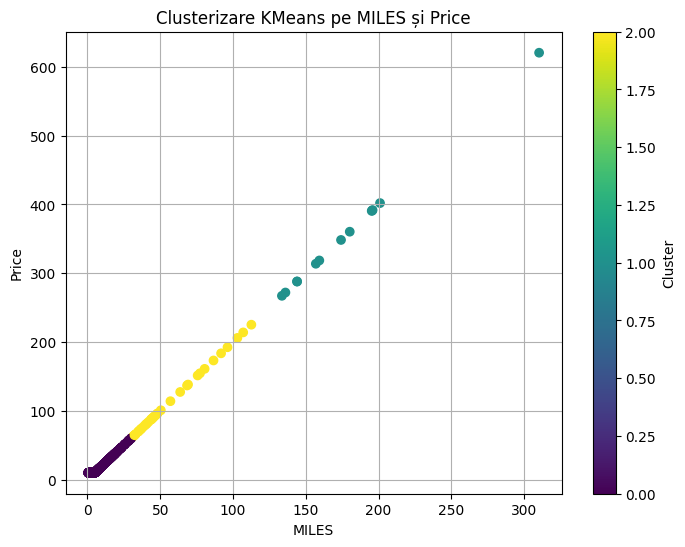

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Alegem două variabile relevante pentru clusterizare
X_cluster = df[["MILES", "Price"]]

# Aplicăm KMeans cu 3 clustere
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_cluster)

# Vizualizăm clusterele
plt.figure(figsize=(8, 6))
plt.scatter(df["MILES"], df["Price"], c=df["cluster"], cmap="viridis")
plt.xlabel("MILES")
plt.ylabel("Price")
plt.title("Clusterizare KMeans pe MILES și Price")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [46]:
print(df.shape)
print(df.info())
print(df.head())

(1155, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   START_DATE        1155 non-null   object 
 1   END_DATE          1155 non-null   object 
 2   CATEGORY          1155 non-null   object 
 3   START             1155 non-null   object 
 4   STOP              1155 non-null   object 
 5   MILES             1155 non-null   float64
 6   PURPOSE           653 non-null    object 
 7   Price             1155 non-null   float64
 8   NUMBER_OF_PEOPLE  1155 non-null   float64
 9   has_purpose       1155 non-null   int64  
 10  cluster           1155 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 94.9+ KB
None
            START_DATE             END_DATE  CATEGORY        START  \
0  2016-01-01 21:11:00  2016-01-01 21:17:00  Business  Fort Pierce   
1  2016-01-02 01:25:00  2016-01-02 01:37:00  Business

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Alegem variabile relevante (numerice și categorice)
X_logreg = df[["MILES", "Price", "NUMBER_OF_PEOPLE"]]
y_logreg = df["CATEGORY"].map({"Business": 1, "Personal": 0})

# Împărțim în seturi de antrenare/test
X_train, X_test, y_train, y_test = train_test_split(X_logreg, y_logreg, test_size=0.2, random_state=42)

# Antrenăm modelul
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Afișăm scorurile
print("Raport clasificare:\n", classification_report(y_test, y_pred))


Raport clasificare:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.94      1.00      0.97       216

    accuracy                           0.94       231
   macro avg       0.47      0.50      0.48       231
weighted avg       0.87      0.94      0.90       231



precision: Proporția predicțiilor corecte dintre toate cele prezise ca fiind dintr-o anumită clasă.

Pentru clasa 0 (Personal), precizia este 0.00, ceea ce înseamnă că modelul nu prezice corect deloc pentru această clasă.

Pentru clasa 1 (Business), precizia este 0.94, ceea ce înseamnă că majoritatea predicțiilor pentru această clasă sunt corecte.

Recall : Proporția observărilor corecte identificate de model.

Pentru clasa 0, recall-ul este 0.00, ceea ce sugerează că modelul nu identifică deloc exemplele din această clasă.

Pentru clasa 1, recall-ul este 1.00, ceea ce înseamnă că modelul identifică toate exemplele din clasa „Business”.

F1-Score: Este o medie armonică între precizie și recall. Este un bun indicator al performanței atunci când datele sunt dezechilibrate.

Pentru clasa 0, F1-score este 0.00 (deoarece modelul nu prezice corect clasa 0).

Pentru clasa 1, F1-score este 0.97 (foarte bun).

Accuracy : Proporția predicțiilor corecte față de totalul predicțiilor.

Acuratețea este 0.94, ceea ce înseamnă că 94% din predicțiile totale sunt corecte, dar acest lucru este determinat în mare parte de performanța bună în predicțiile pentru clasa 1.

Macro avg și Weighted avg:

Macro avg calculează media preciziei, recall-ului și F1-score-ului pentru fiecare clasă, tratând fiecare clasă cu aceeași greutate.

Weighted avg ia în considerare proporția fiecărei clase în setul de date, ceea ce înseamnă că clasa majoritară ("Business") va influența mai mult media.

Modelul de regresie logistică performează excelent pentru clasa 1 (Business), dar nu reușește să prezică corect clasa 0 (Personal). Acest lucru sugerează că există un dezechilibru major între cele două clase în datele tale, iar modelul învață mai mult din datele pentru clasa majoritară (Business). Poți încerca să îmbunătățești performanța pentru clasa 0 prin tehnici de echilibrare a datelor (ex. oversampling sau undersampling) sau prin ajustarea pragului de decizie.

In [51]:
import statsmodels.api as sm

# Alegem variabile independente
X_reg = df[["MILES", "NUMBER_OF_PEOPLE"]]
X_reg = sm.add_constant(X_reg)  # Adaugă constanta (intercept)

# Variabila dependentă
y_reg = df["Price"]

# Model OLS (regresie multiplă)
model_ols = sm.OLS(y_reg, X_reg).fit()

# Rezumatul regresiei
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.462e+05
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        16:54:08   Log-Likelihood:                -2767.7
No. Observations:                1155   AIC:                             5541.
Df Residuals:                    1152   BIC:                             5557.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0939      0.216  

Price este variabila dependentă, adică ceea ce încerci să prezici (probabil prețul unui produs sau serviciu, de exemplu).
R-squared (0.996): Indică faptul că 99.6% din variația variabilei dependentă (Price) este explicată de modelul de regresie. Este un indicator excelent al performanței modelului, sugerând o potrivire foarte bună.
F-statistic (146,200): Măsoară semnificația generală a modelului de regresie. În cazul acesta, valoarea este foarte mare, ceea ce sugerează că modelul este semnificativ.

Prob (F-statistic) = 0.00: Aceasta arată că există o probabilitate extrem de mică ca modelul să nu fie semnificativ, ceea ce sugerează că relațiile dintre variabilele independente și dependentă sunt reale.
const (intercept) = 2.0939: Aceasta este valoarea prețului (Price) atunci când toate variabilele explicative sunt egale cu 0. Practic, un preț minim estimat.

MILES = 1.9628: Fiecare unitate suplimentară de distanță (MILES) crește prețul cu 1.9628. Având în vedere valoarea mare a coeficientului, aceasta este o variabilă semnificativă.

NUMBER_OF_PEOPLE = 0.1693: Fiecare persoană suplimentară are un efect mic asupra prețului (0.1693), dar valoarea t (1.712) sugerează că acest coeficient nu este semnificativ la un nivel de încredere de 95%. De asemenea, intervalul de confidență include 0, ceea ce sugerează că această variabilă nu are un efect mare asupra prețului.

In [54]:
df.to_csv('uber_final.csv', index=False)
